# Working With XMILE System Dynamics Models

In this brief document we take a look at the quickest route to importing a System Dynamics model stored in the XMILE format, such as those created with ®Stella (`*.stmx`) or ®iThink (`*.itmx`).

The main thing you need to understand here is that in its standard configuration, the BPTK-Py framework transpiles such models into Python code automatically in the background.

So the code you actually work with in the Jupyter notebook is the transpiled Python model.

BPTK-Py watches the original XMILE file to see whether you have changed the model in the modeling environment – if yes, the model is automatically re-transpiled.

For this mechanism to work, you need to tell BPTK-Py about your model and for this you need to create a scenario file.

In the standard configuration, BPTK-Py expects to find both a `scenarios` folder (which contains the scenario files) and a `simulation_models` folder which initially contains the XMILE models and – once BPTK-Py has been started – also the transpiled Python models.

You can see this directory structure in our tutorial. This tructure can be changed in the BPTK-Py configuration settings, but let's work with the standard settings for now.

To illustrate the process, let's assume you want to work with the `sd_simple_project.itmx` model for the first time. You have set up your Python environment and installed all the necessary packages (read our [installation instructions](https://bptk.transentis.com/en/latest/docs/usage/installation.html) if you haven't done this yet)

Once you have your working enviornment, setting up your first notebook only takes a few minutes if you follow these six steps:

1. Create the directory structure
2. Place your model in the simulation_models directory
3. Create an initial scenario file
4. Create an initial Jupyter notebook
5. Initialize BPTK-Py
6. Start experimenting with your model

## Step 1: Create The Directory Structure

Create a `scenarios` and `simulation_models` directory in your working directory (right next to the `venv` or `virtualenv` directory if you are working with a virtual Python environment).

## Step 2: Place Your Model In The Simulation_Models Directory

Place your model in the `simulation_models` directory. In this example this is the `simulation_models/sd_simple_project.itmx` model.

## Step 3: Create An Initial Scenario File

Next you create an inital scenario file and place it in the `scenarios` directory.

The most minimal scenario file defines the source model, the name of the transpiled model and an empty scenario. You can create a scenario file using JSON or YAML, this example uses JSON.

It doesn't matter what name you give your scenario file – in our tutorial, we have named the file `minimal.json`.


```javascript
{
    "smWorkingWithXMILE":
    {
        "source":"simulation_models/sd_simple_project.itmx",
        "model":"simulation_models/sd_simple_project",
        "scenarios":
        {
          "base": { }
        }
    }
}
```

By convention, we mostly name the python model file (`model` to match the name of the XMILE source file (`source`), but this is just a convention.

The `smWorkingWithXMILE` is the name of the so-called scenario manager which is created by BPTK-Py upon reading the scenario file. Scenario managers are used to store your scenarios. You can give your scenario manager any name you would like, we use the prefix `sm`by convention.

For this example, we have created a sd_simple_project.json containing the above code and placed it in the `scenarios` directory.

## Step 4: Create A Jupyter Notebook

In the next step you need to create a Jupyter notebook which will contain your scenario experiments. Place this notebook directly in your working directory. 

> Important: Of course you can also work directly in the Python console or IPython, but we highly recommend Jupyter Lab.


## Step 5: Initialize BPTK-Py

Now we are ready to initialize BPTK-Py. BPTK-Py automatically reads all the scenario files from the `scenarios` directory and transpiles all the necessary models.

> Important: bptk must be started from the directory containing the `scenarios` directory.

In [1]:
from BPTK_Py import bptk
bptk = bptk()

You should now have a `sd_simple_project.py` file in the `simulation_models` directory. This contains your System Dynamics model in Python code.

> Important: If you are working directly in the `bptk_py_tutorial` folder, there will already be a sd_simple_project.py file. As this is an automatically generated file, you can safely delete it. It will be re-generated as soon as you restart BPTK-Py or change the XMILE model.

It is worth taking a look at the file, because you can see the names of your equations here. BPTK-Py automatically converts your model variable names (such as `Open Taks`) into names that are compliant with Python (such as `openTasks`). Here is what the Python code for `Open Tasks` looks like:

```
'openTasks': lambda t : ( (self.memoize('initialOpenTasks', t)) if ( t  <=  self.starttime ) else (self.memoize('openTasks',t-self.dt) +  self.dt  * ( -1 * ( self.memoize('completionRate',t-self.dt) ) )) )
```

### Show available equations

We know that the automatic renaming of equations might be confusing for
some users, who enjoy the freedom of XMILE when it comes to naming.

That's why we decided to give you a new function call that lists all equations for System Dynamics Models.

Simply run ``bptk.list_equations()`` and optionally the scenario manager(s) and scenario(s) you'd like to see the available equations for.

For example, let us get an overview over all equations and model elements for the scenario manager ``smWorkingWithXMILE``:


In [2]:
bptk.list_equations(scenario_managers=["smWorkingWithXMILE"],scenarios= [])

Available Equations:

Scenario Manager: smWorkingWithXMILE
Scenario: base
------------------
	stock: 			closedTasks
	stock: 			openTasks
	stock: 			staff
	flow: 			completionRate
	converter: 		currentDate
	converter: 		deadline
	converter: 		effortPerTask
	converter: 		initialOpenTasks
	converter: 		initialStaff
	converter: 		remainingTime
	converter: 		schedulePressure
 


As you see, we left the argument ``scenarios`` empty. So we are trying to load all possible scenarios for the given scenario manager. You can also leave ``scenario_managers`` empty to get a full overview over the available SD scenarios and elements!

## Step 6: Start Experimenting With Your Model

We are actually finished with the import now and we can start playing with the model. Here is some code to plot the `Open Tasks` and `Closed Tasks`:

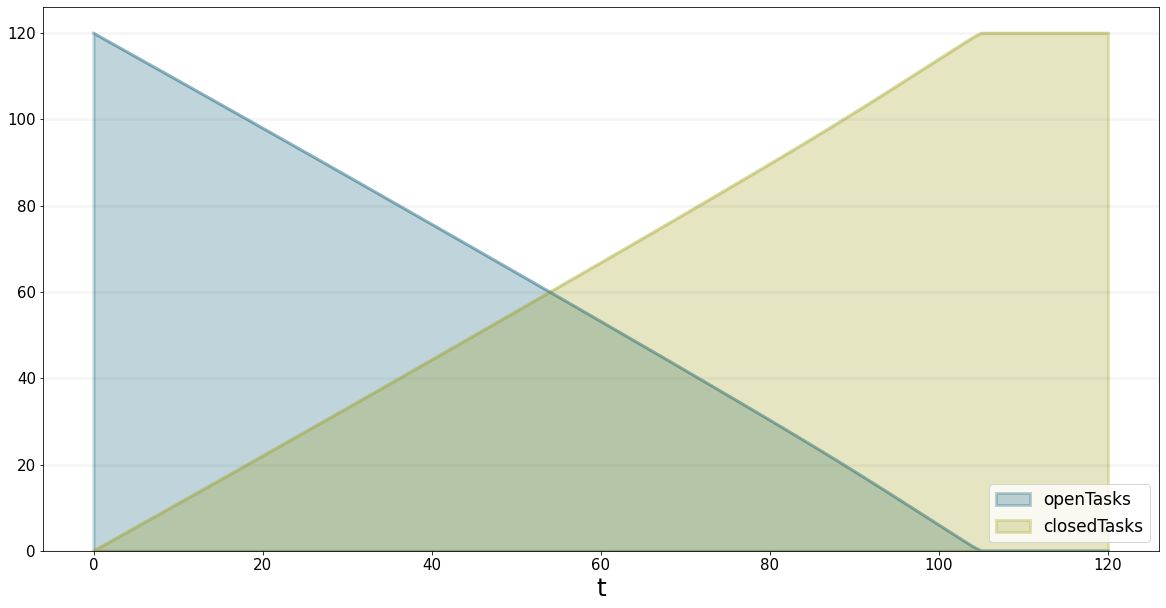

In [3]:
bptk.plot_scenarios(
    scenario_managers=["smWorkingWithXMILE"],
    scenarios=["base"], 
    equations=['openTasks','closedTasks']
)

## Finished

That was it: creating the initial setup for working with XMILE files just takes a few minutes. Create a minimal scenario file, run two Python statements, then you are ready to start experimenting!